In [1]:
!pip install -q datasets

In [2]:
from datasets import load_dataset
emotions = load_dataset("dair-ai/emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
len(train_ds)

16000

In [6]:
train_ds[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [7]:
train_ds.column_names

['text', 'label']

In [8]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [9]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [10]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [11]:
import pandas as pd

In [12]:
emotions.set_format(type="pandas")

In [13]:
df=emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [14]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [15]:
df["label_name"] = df["label"].apply(label_int2str)

In [16]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [17]:
import matplotlib.pyplot as plt

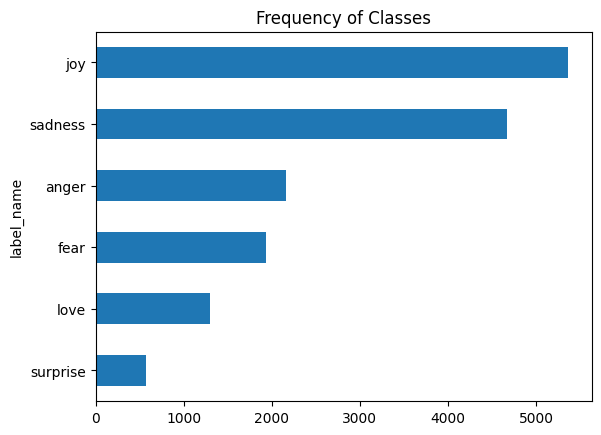

In [18]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

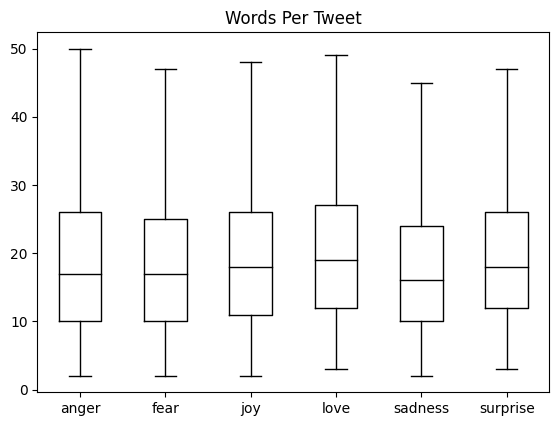

In [19]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid = False, showfliers = False,
          color = "black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [20]:
emotions.reset_format()

In [21]:
text = "It is fun to work with NLP using HuggingFace."

In [22]:
tokenized_text = list(text)

In [23]:
print(tokenized_text)

['I', 't', ' ', 'i', 's', ' ', 'f', 'u', 'n', ' ', 't', 'o', ' ', 'w', 'o', 'r', 'k', ' ', 'w', 'i', 't', 'h', ' ', 'N', 'L', 'P', ' ', 'u', 's', 'i', 'n', 'g', ' ', 'H', 'u', 'g', 'g', 'i', 'n', 'g', 'F', 'a', 'c', 'e', '.']


In [24]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'F': 2, 'H': 3, 'I': 4, 'L': 5, 'N': 6, 'P': 7, 'a': 8, 'c': 9, 'e': 10, 'f': 11, 'g': 12, 'h': 13, 'i': 14, 'k': 15, 'n': 16, 'o': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'w': 22}


In [25]:
input_ids=[token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 20, 0, 14, 19, 0, 11, 21, 16, 0, 20, 17, 0, 22, 17, 18, 15, 0, 22, 14, 20, 13, 0, 6, 5, 7, 0, 21, 19, 14, 16, 12, 0, 3, 21, 12, 12, 14, 16, 12, 2, 8, 9, 10, 1]


In [26]:
df = pd.DataFrame({"name":["can", "efe","ada"],
                  "label":[0,1,2]})
df

,name,label
0,can,0
1,efe,1
2,ada,2


In [27]:
pd.get_dummies(df, dtype=int)

,label,name_ada,name_can,name_efe
0,0,0,1,0
1,1,0,0,1
2,2,1,0,0


In [28]:
import torch

In [29]:
input_ids = torch.tensor(input_ids)

In [30]:
import torch.nn.functional as F

In [31]:
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))

In [32]:
one_hot_encodings.shape

torch.Size([45, 23])

In [33]:
print(f"Token:{tokenized_text[0]}")

Token:I


In [34]:
print(f"Tensor index: {input_ids[0]}")

Tensor index: 4


In [35]:
print(f"One-hot: {one_hot_encodings[0]}")

One-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [36]:
tokenized_text = text.split()
print(tokenized_text)

['It', 'is', 'fun', 'to', 'work', 'with', 'NLP', 'using', 'HuggingFace.']


In [37]:
from transformers import AutoTokenizer

In [38]:
model_ckpt = "distilbert-base-uncased"

In [39]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [40]:
from transformers import DistilBertTokenizer

In [41]:
distbert_tokenize=DistilBertTokenizer.from_pretrained(model_ckpt)

In [42]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2009, 2003, 4569, 2000, 2147, 2007, 17953, 2361, 2478, 17662, 12172, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [43]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'it', 'is', 'fun', 'to', 'work', 'with', 'nl', '##p', 'using', 'hugging', '##face', '.', '[SEP]']


In [44]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] it is fun to work with nlp using huggingface. [SEP]'

In [45]:
tokenizer.vocab_size

30522

In [46]:
tokenizer.model_max_length

512

In [47]:
def tokenize(batch):
    return tokenizer(batch["text"], truncation=True)

In [48]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [49]:
emotions_encoded = emotions.map(tokenize, batched=True,
                               batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [50]:
from transformers import DataCollatorWithPadding

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [51]:
data_collator = DataCollatorWithPadding(tokenizer = tokenizer)

In [52]:
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [53]:
from transformers import AutoModelForSequenceClassification

In [54]:
num_labels = 6

In [55]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [56]:
model=AutoModelForSequenceClassification.from_pretrained(model_ckpt,
         num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [57]:
!pip install -q evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [58]:
import evaluate

In [59]:
accuracy = evaluate.load("accuracy")

In [60]:
import numpy as np

In [61]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, 
                           references = labels)

In [62]:
from huggingface_hub import notebook_login

In [63]:
notebook_login()

In [68]:
from transformers import TrainingArguments

In [69]:
training_args = TrainingArguments(
    output_dir="distilbert-emotion",
    num_train_epochs = 2, 
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy = "epoch",
    load_best_model_at_end = True,
    push_to_hub = True,
    report_to = "none"    
)

In [70]:
from transformers import Trainer

In [71]:
trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotions_encoded["train"],
    eval_dataset = emotions_encoded["validation"],
    tokenizer = tokenizer,
)

In [72]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.233222,0.916000
2,No log,0.162480,0.932000


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=250, training_loss=0.4517395629882813, metrics={'train_runtime': 107.3843, 'train_samples_per_second': 297.995, 'train_steps_per_second': 2.328, 'total_flos': 498311664233472.0, 'train_loss': 0.4517395629882813, 'epoch': 2.0})

In [73]:
preds_output = trainer.predict(emotions_encoded["validation"])

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [74]:
preds_output.metrics

{'test_loss': 0.16247962415218353,
 'test_accuracy': 0.932,
 'test_runtime': 2.2026,
 'test_samples_per_second': 908.036,
 'test_steps_per_second': 7.264}

In [75]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [77]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize = "true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                 display_labels=labels)
    disp.plot(cmap="Blues", values_format = ".2f", ax = ax,
             colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [78]:
y_valid = np.array(emotions_encoded["validation"]["label"])

In [79]:
labels = emotions["train"].features["label"].names

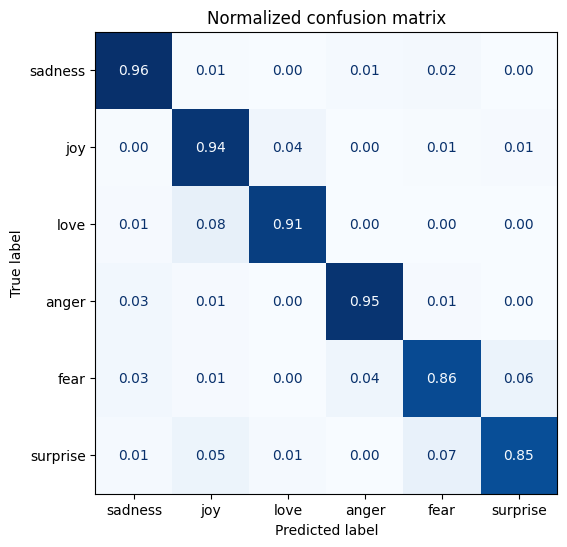

In [80]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [81]:
trainer.push_to_hub(commit_message="Training completed!")

'https://huggingface.co/Tirendaz/distilbert-emotion/tree/main/'

In [82]:
from transformers import pipeline

In [83]:
model_id = "Tirendaz/distilbert-emotion"

In [84]:
classifier = pipeline("text-classification", model= model_id)

In [85]:
custom_text="I watched a movie yesterday. It was really good."

In [86]:
preds=classifier(custom_text, return_all_scores = True)

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [87]:
preds_df = pd.DataFrame(preds[0])

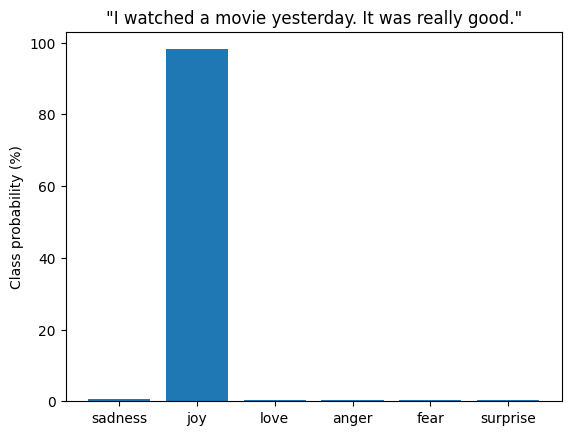

In [88]:
plt.bar(labels, 100*preds_df["score"])
plt.title(f'"{custom_text}"')
plt.ylabel("Class probability (%)")
plt.show()